In [1]:
import pandas as pd
import re 
import xgboost
import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from time import perf_counter, sleep
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost 
from sklearn.metrics  import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score 
from sklearn import metrics
import time
from keras.preprocessing.text import text_to_word_sequence
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [4]:
dataset = pd.read_csv("C://Users/joy01/Downloads/BBCNewsTrain.csv")
test_set = pd.read_csv("C://Users/joy01/Downloads/BBC News Test.csv")
dataset.head()
test_set.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [5]:
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [6]:
dataset['categoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,categoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [7]:
category = dataset[["Category","categoryId"]].drop_duplicates().sort_values('categoryId')
category

,Category,categoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [8]:
dataset.groupby('Category').categoryId.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: categoryId, dtype: int64

<AxesSubplot:xlabel='Category'>

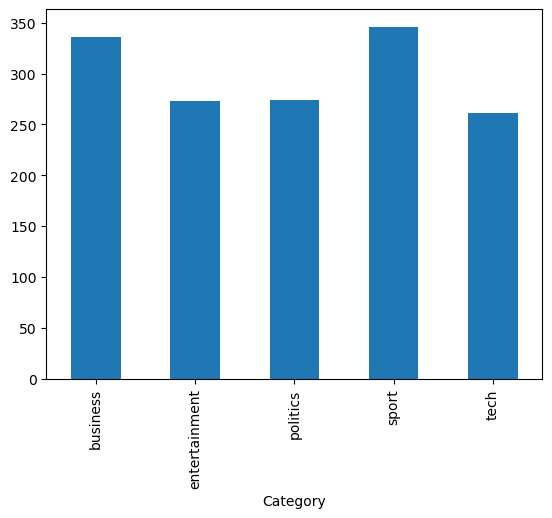

In [9]:
dataset.groupby('Category').categoryId.count().plot.bar(ylim=0)

In [10]:
text = dataset["Text"] 
text.head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [11]:
category = dataset["Category"]
category.head()

0    business
1    business
2    business
3        tech
4    business
Name: Category, dtype: object

In [12]:
def preprocessDataset(train_text):
       
    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower = True, split = " ")
        
    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
        
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
        
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
       
        
    #--Stemming--
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
        
        
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
        
    return lem_text

In [13]:
dataset["Text"] = dataset["Text"].apply(preprocessDataset)
text = dataset['Text']
category = dataset['Category']
text.head()

0    worldcom ex bos launch defenc lawyer defend fo...
1    german busi confid slide german busi confid fe...
2    bbc poll indic econom gloom citizen major nati...
3    lifestyl govern mobil choic faster well funkie...
4    enron bos m payout eighteen former enron direc...
Name: Text, dtype: object

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

1043
447


In [15]:
start = perf_counter()
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

end = perf_counter()

print(f"Time taken to execute code : {end-start}")

Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.98      0.94      0.96       105
         tech       0.93      1.00      0.96        76
     politics       0.93      0.94      0.93        81
        sport       1.00      0.98      0.99       106
entertainment       0.96      0.95      0.96        79

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447

Time taken to execute code : 1.9480021000000534


In [16]:
vec = CountVectorizer(stop_words = 'english')

In [17]:
vec.fit(X_train)
print(len(vec.get_feature_names_out()))
vec.vocabulary_

13379


{'broadband': 1533,
 'uk': 12318,
 'grow': 5111,
 'fast': 4182,
 'high': 5457,
 'speed': 11129,
 'net': 8108,
 'connect': 2468,
 'prove': 9352,
 'popular': 9104,
 'bt': 1591,
 'report': 9854,
 'peopl': 8818,
 'sign': 10784,
 'month': 7824,
 'quarter': 9444,
 'total': 12070,
 'number': 8284,
 'million': 7678,
 'nation': 8044,
 'brow': 1566,
 'britain': 1520,
 'europ': 3972,
 'accord': 69,
 'figur': 4303,
 'gather': 4742,
 'industri': 5900,
 'watchdog': 12916,
 'ofcom': 8338,
 'growth': 5113,
 'mean': 7498,
 'surpass': 11583,
 'germani': 4817,
 'term': 11843,
 'user': 12605,
 'translat': 12135,
 'compar': 2376,
 'netherland': 8111,
 'includ': 5855,
 'servic': 10580,
 'direct': 3279,
 'mani': 7256,
 'compani': 2374,
 'sell': 10530,
 'line': 6928,
 'surg': 11579,
 'stretch': 11414,
 'reach': 9609,
 'adsl': 146,
 'wide': 13056,
 'use': 12603,
 'way': 12932,
 'km': 6553,
 'asymmetr': 693,
 'digit': 3239,
 'subscrib': 11473,
 'technolog': 11791,
 'let': 6835,
 'ordinari': 8448,
 'copper': 257

In [18]:
X_transformed = vec.transform(X_train)
X_transformed

<1043x13379 sparse matrix of type '<class 'numpy.int64'>'
	with 131256 stored elements in Compressed Sparse Row format>

In [19]:
print(X_transformed)

  (0, 27)	1
  (0, 69)	1
  (0, 146)	1
  (0, 470)	1
  (0, 587)	1
  (0, 693)	1
  (0, 772)	1
  (0, 1470)	1
  (0, 1520)	1
  (0, 1533)	10
  (0, 1566)	1
  (0, 1591)	11
  (0, 1714)	1
  (0, 1856)	1
  (0, 2075)	1
  (0, 2374)	1
  (0, 2376)	1
  (0, 2384)	1
  (0, 2468)	5
  (0, 2575)	1
  (0, 2677)	2
  (0, 2828)	2
  (0, 2923)	1
  (0, 3077)	1
  (0, 3155)	1
  :	:
  (1042, 8504)	1
  (1042, 8536)	1
  (1042, 8939)	1
  (1042, 9021)	1
  (1042, 9380)	2
  (1042, 9515)	1
  (1042, 9609)	1
  (1042, 10197)	2
  (1042, 10361)	1
  (1042, 10496)	1
  (1042, 10510)	7
  (1042, 10535)	3
  (1042, 10831)	1
  (1042, 10849)	2
  (1042, 11089)	2
  (1042, 11096)	1
  (1042, 12008)	3
  (1042, 12090)	1
  (1042, 12192)	1
  (1042, 12521)	1
  (1042, 12815)	2
  (1042, 12969)	1
  (1042, 13076)	2
  (1042, 13096)	1
  (1042, 13294)	3


In [20]:
pd.DataFrame(X_transformed.toarray(), columns= [vec.get_feature_names_out()])

,aa,aaa,aac,aadc,aaron,abacu,abandon,abba,abbasi,abbott,...,zoellick,zola,zombi,zone,zonealarm,zoom,zorro,zuluaga,zurich,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
X_test_transformed = vec.transform(X_test)
X_test_transformed

<447x13379 sparse matrix of type '<class 'numpy.int64'>'
	with 54602 stored elements in Compressed Sparse Row format>

In [22]:
print(X_test_transformed)

  (0, 152)	1
  (0, 231)	1
  (0, 587)	1
  (0, 672)	1
  (0, 765)	1
  (0, 785)	1
  (0, 1001)	2
  (0, 1170)	1
  (0, 1294)	1
  (0, 1417)	1
  (0, 1615)	1
  (0, 1677)	1
  (0, 1769)	6
  (0, 2158)	1
  (0, 2235)	1
  (0, 2245)	1
  (0, 2342)	1
  (0, 2372)	1
  (0, 2619)	1
  (0, 2831)	1
  (0, 2923)	2
  (0, 2941)	1
  (0, 3280)	1
  (0, 3538)	1
  (0, 3904)	1
  :	:
  (446, 11931)	1
  (446, 11973)	1
  (446, 12022)	1
  (446, 12138)	1
  (446, 12172)	2
  (446, 12178)	2
  (446, 12199)	1
  (446, 12264)	2
  (446, 12390)	1
  (446, 12392)	1
  (446, 12574)	1
  (446, 12603)	7
  (446, 12605)	2
  (446, 12640)	1
  (446, 12786)	4
  (446, 12787)	6
  (446, 12929)	1
  (446, 12932)	3
  (446, 12950)	1
  (446, 13184)	1
  (446, 13185)	1
  (446, 13199)	1
  (446, 13202)	1
  (446, 13231)	6
  (446, 13233)	3


In [23]:
pd.DataFrame(X_test_transformed.toarray(), columns= [vec.get_feature_names_out()])

,aa,aaa,aac,aadc,aaron,abacu,abandon,abba,abbasi,abbott,...,zoellick,zola,zombi,zone,zonealarm,zoom,zorro,zuluaga,zurich,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logestic Regression

In [24]:
start = perf_counter()
logit = LogisticRegression()
logit.fit(X_transformed, Y_train)

LogisticRegression()

In [25]:
# fit
logit.fit(X_transformed,Y_train)

# predict class
y_pred_class = logit.predict(X_test_transformed)

# predict probabilities
y_pred_proba = logit.predict_proba(X_test_transformed)


end = perf_counter()
print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 9.637508099999991


In [26]:
metrics.accuracy_score(Y_test, y_pred_class)


0.959731543624161

In [27]:
cnf_mat1= metrics.confusion_matrix(Y_test, y_pred_class)
np.set_printoptions(precision=2)
cnf_mat1

array([[ 97,   0,   3,   1,   0],
       [  0,  78,   1,   1,   2],
       [  3,   0,  76,   1,   2],
       [  0,   0,   0, 104,   0],
       [  1,   0,   1,   2,  74]], dtype=int64)

In [28]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[ 97   0   3   1   0]
 [  0  78   1   1   2]
 [  3   0  76   1   2]
 [  0   0   0 104   0]
 [  1   0   1   2  74]]


In [29]:
import itertools

def ConfusionMatrixDisplay(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[ 97   0   3   1   0]
 [  0  78   1   1   2]
 [  3   0  76   1   2]
 [  0   0   0 104   0]
 [  1   0   1   2  74]]


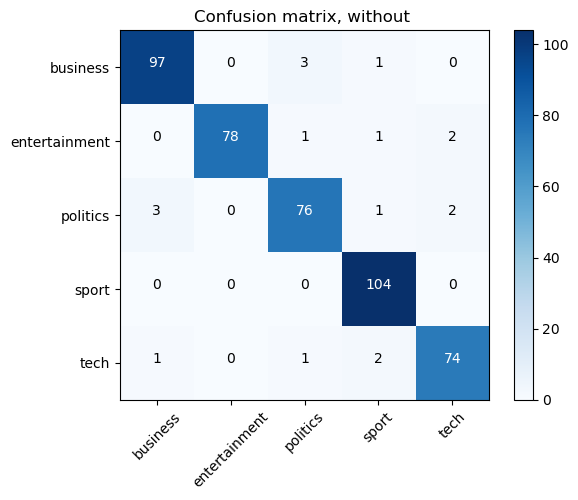

In [30]:
plt.figure()
ConfusionMatrixDisplay(cnf_mat1, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without ')

plt.show()


# Naive Bayes

In [31]:
start = perf_counter()
nb = MultinomialNB()
nb.fit(X_transformed, Y_train)

MultinomialNB()

In [32]:
nb.fit(X_transformed,Y_train)

# predict class
y_pred_class = nb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = nb.predict_proba(X_test_transformed)
end = perf_counter()
print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 0.09385250000002543


In [33]:
metrics.accuracy_score(Y_test, y_pred_class)


0.9686800894854586

In [34]:
cnf_mat= metrics.confusion_matrix(Y_test, y_pred_class)
np.set_printoptions(precision=2)
cnf_mat

array([[ 97,   0,   4,   0,   0],
       [  0,  77,   1,   0,   4],
       [  2,   0,  78,   0,   2],
       [  0,   0,   0, 104,   0],
       [  0,   0,   1,   0,  77]], dtype=int64)

In [35]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[ 97   0   4   0   0]
 [  0  77   1   0   4]
 [  2   0  78   0   2]
 [  0   0   0 104   0]
 [  0   0   1   0  77]]


In [36]:
import itertools

def ConfusionMatrixDisplay(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[ 97   0   4   0   0]
 [  0  77   1   0   4]
 [  2   0  78   0   2]
 [  0   0   0 104   0]
 [  0   0   1   0  77]]
Normalized Confusion Matrix
[[0.96 0.   0.04 0.   0.  ]
 [0.   0.94 0.01 0.   0.05]
 [0.02 0.   0.95 0.   0.02]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.01 0.   0.99]]


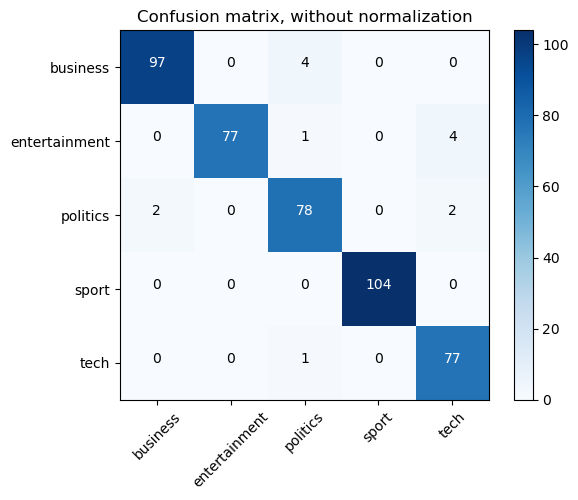

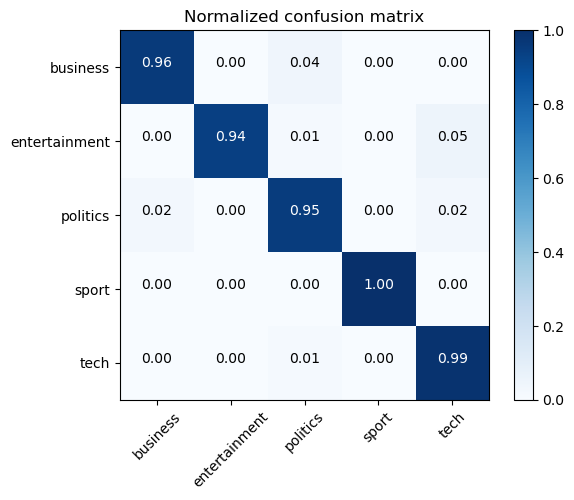

In [37]:
plt.figure()
ConfusionMatrixDisplay(cnf_mat, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
ConfusionMatrixDisplay(cnf_mat,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Decision Tree

In [38]:
start = perf_counter()
tree = DecisionTreeClassifier()
tree.fit(X_transformed, Y_train)

DecisionTreeClassifier()

In [39]:

tree.fit(X_transformed,Y_train)

# predict class
y_pred_class = tree.predict(X_test_transformed)

# predict probabilities
y_pred_proba = tree.predict_proba(X_test_transformed)
end = perf_counter()
print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 2.5809007000000292


In [40]:
metrics.accuracy_score(Y_test, y_pred_class)

0.8120805369127517

In [41]:
cnf_mat2= metrics.confusion_matrix(Y_test, y_pred_class)
np.set_printoptions(precision=2)
cnf_mat2

array([[ 76,   0,  10,   4,  11],
       [  5,  57,   6,  10,   4],
       [  6,   3,  67,   5,   1],
       [  1,   0,   0, 100,   3],
       [  3,   5,   3,   4,  63]], dtype=int64)

In [42]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[ 76   0  10   4  11]
 [  5  57   6  10   4]
 [  6   3  67   5   1]
 [  1   0   0 100   3]
 [  3   5   3   4  63]]


In [43]:
import itertools

def ConfusionMatrixDisplay(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[ 76   0  10   4  11]
 [  5  57   6  10   4]
 [  6   3  67   5   1]
 [  1   0   0 100   3]
 [  3   5   3   4  63]]
Normalized Confusion Matrix
[[0.75 0.   0.1  0.04 0.11]
 [0.06 0.7  0.07 0.12 0.05]
 [0.07 0.04 0.82 0.06 0.01]
 [0.01 0.   0.   0.96 0.03]
 [0.04 0.06 0.04 0.05 0.81]]


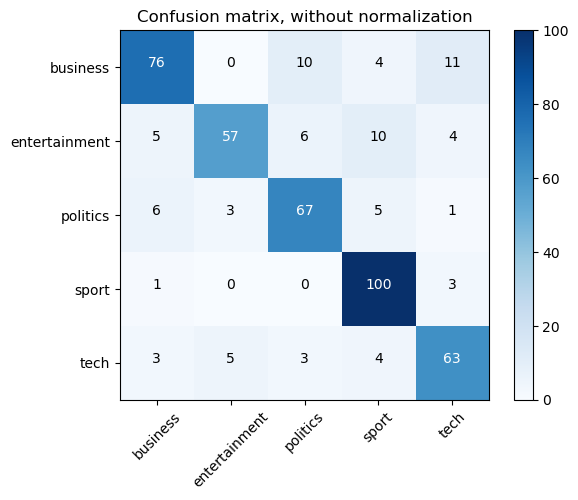

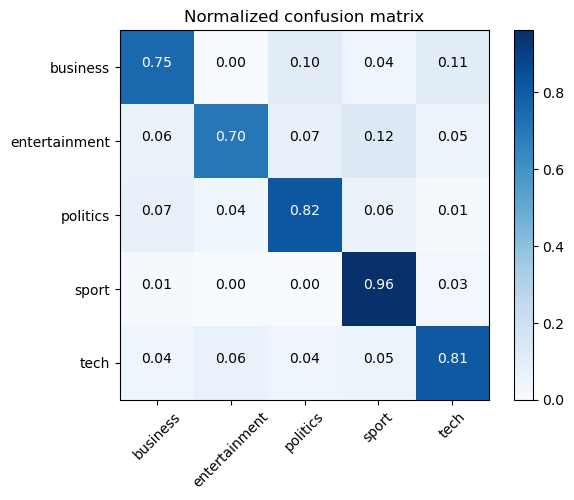

In [44]:
# plt.figure()
ConfusionMatrixDisplay(cnf_mat2, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
ConfusionMatrixDisplay(cnf_mat2,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# SVM 

In [45]:
start = perf_counter()
sv = svm.SVC()
sv.fit(X_transformed, Y_train)

SVC()

In [46]:

sv.fit(X_transformed,Y_train)

# predict class
y_pred_class = sv.predict(X_test_transformed)

end = perf_counter()
print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 9.656222899999989


In [47]:
metrics.accuracy_score(Y_test, y_pred_class)

0.9485458612975392

In [48]:
cnf_mat3= metrics.confusion_matrix(Y_test, y_pred_class)
np.set_printoptions(precision=2)
cnf_mat3

array([[ 98,   0,   3,   0,   0],
       [  0,  78,   2,   1,   1],
       [  3,   0,  72,   1,   6],
       [  0,   0,   0, 102,   2],
       [  1,   1,   0,   2,  74]], dtype=int64)

In [49]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[ 98   0   3   0   0]
 [  0  78   2   1   1]
 [  3   0  72   1   6]
 [  0   0   0 102   2]
 [  1   1   0   2  74]]


In [50]:
import itertools

def ConfusionMatrixDisplay(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[ 98   0   3   0   0]
 [  0  78   2   1   1]
 [  3   0  72   1   6]
 [  0   0   0 102   2]
 [  1   1   0   2  74]]
Normalized Confusion Matrix
[[0.97 0.   0.03 0.   0.  ]
 [0.   0.95 0.02 0.01 0.01]
 [0.04 0.   0.88 0.01 0.07]
 [0.   0.   0.   0.98 0.02]
 [0.01 0.01 0.   0.03 0.95]]


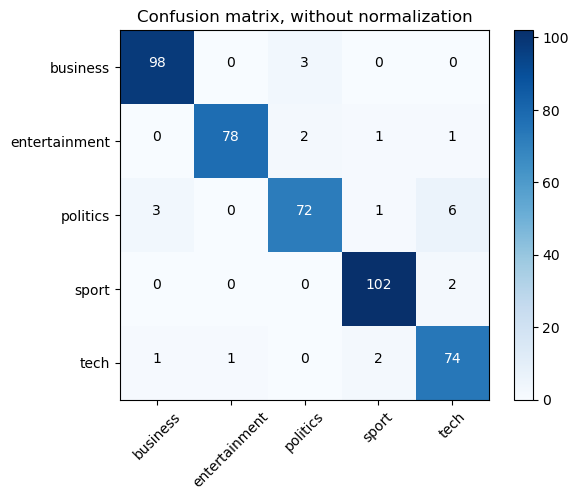

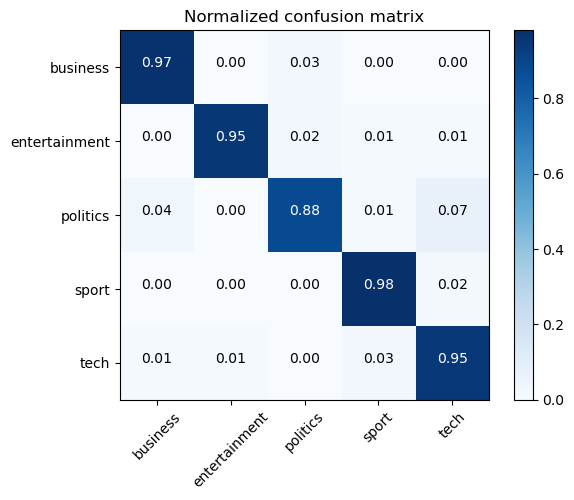

In [51]:
plt.figure()
ConfusionMatrixDisplay(cnf_mat3, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
ConfusionMatrixDisplay(cnf_mat3,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Random Forest

In [52]:
start = perf_counter()
rf = RandomForestClassifier()
rf.fit(X_transformed, Y_train)

RandomForestClassifier()

In [53]:

rf.fit(X_transformed,Y_train)

# predict class
y_pred_class = rf.predict(X_test_transformed)

# predict probabilities
y_pred_proba = rf.predict_proba(X_test_transformed)
end = perf_counter()
print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 11.160408599999982


In [54]:
metrics.accuracy_score(Y_test, y_pred_class)

0.9507829977628636

In [55]:
cnf_mat4= metrics.confusion_matrix(Y_test, y_pred_class)
np.set_printoptions(precision=2)
cnf_mat4

array([[ 99,   0,   2,   0,   0],
       [  0,  76,   3,   1,   2],
       [  8,   0,  74,   0,   0],
       [  0,   0,   0, 104,   0],
       [  2,   0,   1,   3,  72]], dtype=int64)

In [56]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[ 99   0   2   0   0]
 [  0  76   3   1   2]
 [  8   0  74   0   0]
 [  0   0   0 104   0]
 [  2   0   1   3  72]]


In [57]:
import itertools

def ConfusionMatrixDisplay(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[ 99   0   2   0   0]
 [  0  76   3   1   2]
 [  8   0  74   0   0]
 [  0   0   0 104   0]
 [  2   0   1   3  72]]
Normalized Confusion Matrix
[[0.98 0.   0.02 0.   0.  ]
 [0.   0.93 0.04 0.01 0.02]
 [0.1  0.   0.9  0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.03 0.   0.01 0.04 0.92]]


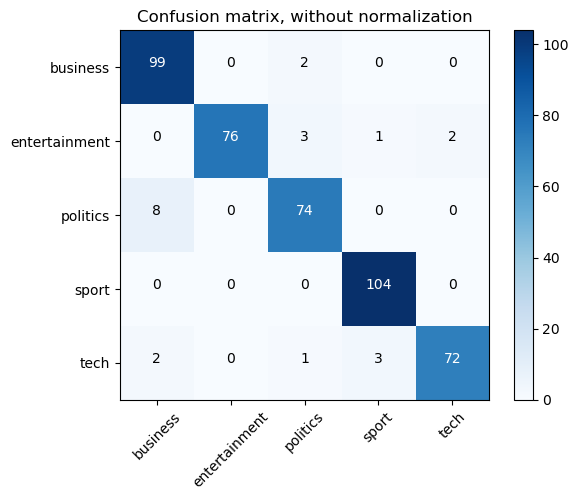

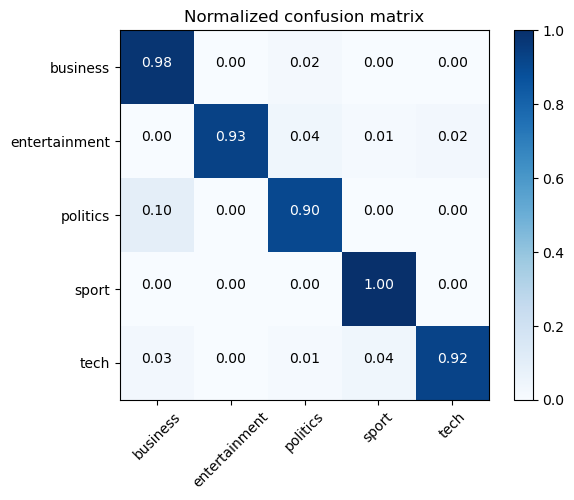

In [58]:
plt.figure()
ConfusionMatrixDisplay(cnf_mat4, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
ConfusionMatrixDisplay(cnf_mat4,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# AdaBoost 

In [59]:
start = perf_counter()
ab = AdaBoostClassifier(random_state = 1)
ab.fit(X_transformed, Y_train)

AdaBoostClassifier(random_state=1)

In [60]:
ab.fit(X_transformed,Y_train)

# predict class
y_pred_class = ab.predict(X_test_transformed)

# predict probabilities
y_pred_proba = ab.predict_proba(X_test_transformed)
end = perf_counter()
print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 5.925347600000009


In [61]:
metrics.accuracy_score(Y_test, y_pred_class)

0.8210290827740492

In [62]:
cnf_mat5= metrics.confusion_matrix(Y_test, y_pred_class)
np.set_printoptions(precision=2)
cnf_mat5

array([[90,  1,  5,  5,  0],
       [ 3, 64,  2, 10,  3],
       [17,  1, 57,  6,  1],
       [ 7,  0,  3, 94,  0],
       [ 9,  0,  5,  2, 62]], dtype=int64)

In [63]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[90  1  5  5  0]
 [ 3 64  2 10  3]
 [17  1 57  6  1]
 [ 7  0  3 94  0]
 [ 9  0  5  2 62]]


In [64]:
import itertools

def ConfusionMatrixDisplay(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[90  1  5  5  0]
 [ 3 64  2 10  3]
 [17  1 57  6  1]
 [ 7  0  3 94  0]
 [ 9  0  5  2 62]]
Normalized Confusion Matrix
[[0.89 0.01 0.05 0.05 0.  ]
 [0.04 0.78 0.02 0.12 0.04]
 [0.21 0.01 0.7  0.07 0.01]
 [0.07 0.   0.03 0.9  0.  ]
 [0.12 0.   0.06 0.03 0.79]]


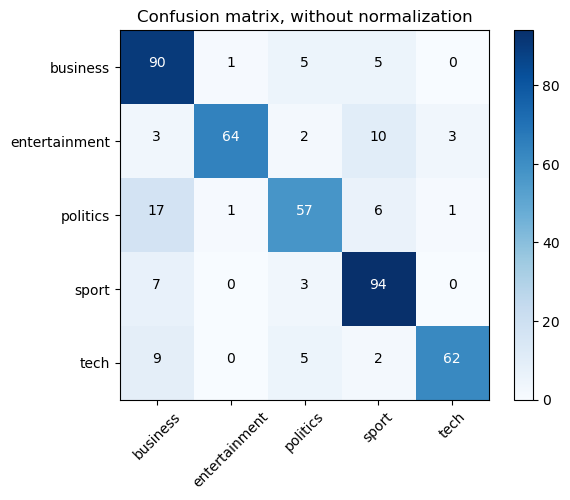

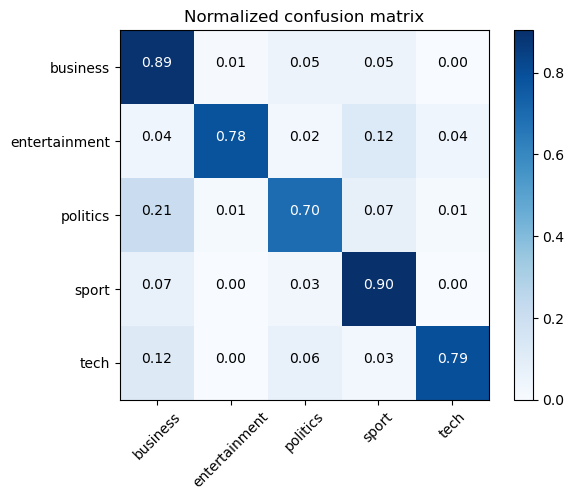

In [65]:
plt.figure()
ConfusionMatrixDisplay(cnf_mat5, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
ConfusionMatrixDisplay(cnf_mat5,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()